# Neural Network for Drug Efficiency Against Tumors
We will use data from http://cancerrgene.org The drug with the lowest IC50 index is the drug that has the highest efficiency.The concentration of a drug or inhibitor needed to inhibit a biological process or response by 50%.IC50 is commonly used as a measure of drug potency in whole cell assays. IC50 assays are also used for screening in target-based drug discovery campaigns. I have included the gene expression cancer RNA-Seq Data Set from the https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq# This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set, it is a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD. This program takes the IC50 data from the LUAD pancancer compares it against random genes selected by the usesr to predict accuracy. The User can use multiple X variables and Y variables if the choose. My chosen metric is the IC50 data of all the LUAD cancer drugs for Y and gene_100 and gene_1000 for X which produces an constant accuracy of 0.9285714030265808 or 92.8% as well as the prediction data which proves it just doesnt not read one piece of data giving an false accuracy of 100%.

## Libraries Needed
 - numpy
 - matplotlib
 - pandas
 - tensorflow
 - keras
 - scikit-learn

## Import Python libraries

In [ ]:
# data handling libraries
import pandas as pd
import numpy as np

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# neural building Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns



## Read data

In [ ]:

#read data directly from a Home or cloudrive
file_name='/Users/Albert3/Downloads/M_LUAD_cancer_expression.csv'
df=pd.read_csv(file_name)


/var/folders/d9/f8xx3ggn7y5f7tr2jyd4nkk80000gp/T/ipykernel_18726/3283491975.py:4: DtypeWarning: Columns (8003) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_name)


## Data Exploration & Cleaning
Data cleaning is very important in machine learning as it makes our data to be of a high quality for better results.
- Here we will check for Null values and remove them for greater accuracy\
- In the exploration stage we will see the structure of our data, the columns, rows and their numbers




In [ ]:
# How to check the rows of your data. By placing a number within the () you can control how much you can see.
df.head(50)

,Drug Name,IC50,Cell Line Name,TCGA Classification,Tissue,Tissue Sub-type,AUC,gene_5,gene_6,gene_7,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,Erlotinib,-3.130315,NCI-H1648,LUAD,lung,lung_NSCLC_adenocarcinoma,0.349972,0.0,0.000000,0.000000,...,12.555854,8.118645,4.530214,6.550340,11.619693,7.841923,10.426789,6.269480,1.789228,LUAD
1,Erlotinib,3.661843,NCI-H1650,LUAD,lung,lung_NSCLC_adenocarcinoma,0.983298,0.0,1.094304,0.000000,...,11.638567,9.391950,6.860590,7.007823,11.215096,8.229261,10.309976,5.823204,2.139208,LUAD
2,Erlotinib,2.322838,NCI-H1838,LUAD,lung,lung_NSCLC_adenocarcinoma,0.931209,0.0,0.000000,0.000000,...,11.707851,8.286387,3.861062,5.835767,11.819928,6.562594,10.455985,5.784609,1.374010,LUAD
3,Erlotinib,3.009075,Calu-6,LUAD,lung,lung_NSCLC_adenocarcinoma,0.973850,0.0,0.000000,0.000000,...,11.348097,8.543747,4.920260,7.052644,11.570586,6.298341,10.271883,9.088407,2.460612,LUAD
4,Erlotinib,0.954770,NCI-H1355,LUAD,lung,lung_NSCLC_adenocarcinoma,0.852814,0.0,0.000000,0.449957,...,11.055045,9.217803,4.214863,6.581988,11.495985,7.716785,10.308157,5.327881,1.973905,LUAD
5,Erlotinib,1.796901,LXF-289,LUAD,lung,lung_NSCLC_adenocarcinoma,0.947678,0.0,0.000000,0.000000,...,10.342241,8.404098,7.769435,6.490695,12.142949,7.964786,9.244109,7.167900,3.957571,LUAD
6,Erlotinib,3.145254,NCI-H23,LUAD,lung,lung_NSCLC_adenocarcinoma,0.987954,0.0,0.000000,0.000000,...,11.935379,7.799120,7.440994,6.454410,11.629398,7.223423,10.135991,7.894854,2.916247,LUAD
7,Erlotinib,1.134468,NCI-H322M,LUAD,lung,lung_NSCLC_adenocarcinoma,0.857633,0.0,0.000000,0.283922,...,11.038981,8.587384,5.841188,6.800680,11.557693,7.881940,10.344584,7.232785,3.245176,LUAD
8,Erlotinib,-1.097318,EKVX,LUAD,lung,lung_NSCLC_adenocarcinoma,0.612032,0.0,0.000000,0.000000,...,11.068946,9.549954,6.439708,7.119616,11.669018,7.911452,10.428119,6.373664,4.275126,LUAD
9,Erlotinib,2.754328,HOP-62,LUAD,lung,lung_NSCLC_adenocarcinoma,0.976583,0.0,0.000000,0.000000,...,12.750797,9.746995,7.842797,6.616812,10.841336,7.588182,10.513303,6.047514,4.087463,LUAD


In [ ]:
# Checking for any null values in our dataset
df.isnull().sum()


Drug Name                  0
IC50                       0
Cell Line Name             0
TCGA Classification        0
Tissue                     0
                       ...  
gene_7997              37164
gene_7998              37164
gene_7999              37164
gene_8000              37164
Cancer_Type            37164
Length: 8004, dtype: int64

## Dropping the null values

In [ ]:
# Dropping The rows that have the null values so our data may be accurate as possible
df = df.dropna(axis=0, how = "any", thresh=None, inplace=False)
df


,Drug Name,IC50,Cell Line Name,TCGA Classification,Tissue,Tissue Sub-type,AUC,gene_5,gene_6,gene_7,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,Erlotinib,-3.130315,NCI-H1648,LUAD,lung,lung_NSCLC_adenocarcinoma,0.349972,0.0,0.000000,0.000000,...,12.555854,8.118645,4.530214,6.550340,11.619693,7.841923,10.426789,6.269480,1.789228,LUAD
1,Erlotinib,3.661843,NCI-H1650,LUAD,lung,lung_NSCLC_adenocarcinoma,0.983298,0.0,1.094304,0.000000,...,11.638567,9.391950,6.860590,7.007823,11.215096,8.229261,10.309976,5.823204,2.139208,LUAD
2,Erlotinib,2.322838,NCI-H1838,LUAD,lung,lung_NSCLC_adenocarcinoma,0.931209,0.0,0.000000,0.000000,...,11.707851,8.286387,3.861062,5.835767,11.819928,6.562594,10.455985,5.784609,1.374010,LUAD
3,Erlotinib,3.009075,Calu-6,LUAD,lung,lung_NSCLC_adenocarcinoma,0.973850,0.0,0.000000,0.000000,...,11.348097,8.543747,4.920260,7.052644,11.570586,6.298341,10.271883,9.088407,2.460612,LUAD
4,Erlotinib,0.954770,NCI-H1355,LUAD,lung,lung_NSCLC_adenocarcinoma,0.852814,0.0,0.000000,0.449957,...,11.055045,9.217803,4.214863,6.581988,11.495985,7.716785,10.308157,5.327881,1.973905,LUAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Imatinib,4.842578,EKVX,LUAD,lung,lung_NSCLC_adenocarcinoma,0.969525,0.0,0.000000,0.000000,...,12.034046,10.109073,3.822363,6.546320,11.552491,7.565529,10.036284,4.403118,2.024142,LUAD
136,Imatinib,3.216546,HOP-62,LUAD,lung,lung_NSCLC_adenocarcinoma,0.984712,0.0,0.000000,0.000000,...,11.652648,10.296538,5.536109,6.551393,11.651460,6.541162,9.566528,7.036064,5.289503,LUAD
137,Imatinib,2.399868,LC-2-ad,LUAD,lung,lung_NSCLC_adenocarcinoma,0.968619,0.0,0.000000,0.000000,...,11.677649,9.274949,6.362650,6.579296,11.929869,7.825315,10.703246,7.255765,2.406292,LUAD
138,Imatinib,3.441119,NCI-H1666,LUAD,lung,lung_NSCLC_adenocarcinoma,0.980025,0.0,0.000000,0.000000,...,11.813236,9.267536,7.128139,6.991669,11.315704,7.145392,10.259449,7.162452,1.424116,LUAD


In [ ]:
# Checking if the Null Values have been dropped
df.isnull().any()

Drug Name              False
IC50                   False
Cell Line Name         False
TCGA Classification    False
Tissue                 False
                       ...  
gene_7997              False
gene_7998              False
gene_7999              False
gene_8000              False
Cancer_Type            False
Length: 8004, dtype: bool

As it can be seen our data is now cleaned and does not contain any rows that have null values

## Checking for the drugs that our data set contains

In [ ]:
df["gene_1000"].value_counts()


0.000000    124
8.360593      1
1.531619      1
1.063986      1
3.176817      1
0.785592      1
2.647338      1
7.538926      1
0.357608      1
1.795684      1
2.797698      1
9.011437      1
8.519687      1
0.695905      1
1.440686      1
1.492981      1
1.731835      1
Name: gene_1000, dtype: int64

 
## **Data preprocesing** 
This is done to put the data in an appropriate format before modelling


In [ ]:
# In our data we will use the following columns to develop our model that will be assigned to x and y variables

Y=df[["IC50"]].values

X= df[["gene_1000"]].values
X= df[["gene_89"]].values


\
**Encode labels**

The labels for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms.

In [ ]:
#let's encode target labels (y) with values between 0 and n_classes-1.
# we will be using LabelEncoder to perform the encoding
label_encoder=LabelEncoder()
label_encoder.fit(X)
y=label_encoder.transform(X)
labels=label_encoder.classes_
classes=np.unique(X)
nclasses=np.unique(X).shape[0]

/Users/Albert3/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Albert3/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


\
**Data Splitting**\
Data is split into three: training, validation and test sets\
-validation set is used for evaluating the model during training.\
-training set is used for training\
-test set is used to test the model after training and tuning has been completed.

In [ ]:
# let's encode target labels (y) with values between 0 and n_classes-1.
# we will be using LabelEncoder to perform the encoding

label_encoder=LabelEncoder()
label_encoder.fit(X)
y=label_encoder.transform(X)
labels=label_encoder.classes_
classes=np.unique(X)
nclasses=np.unique(X).shape[0]
nclasses

15

In [ ]:
#split data into training,validation and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=1)

#split the training set into two (training and validation)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.3)

In [ ]:
# check the shape of X_train and y_train
X_train.shape, y_train.shape

((68, 1), (68,))

\
**Data Normalization**\
Data normalization is done so the values are in the same range to improve model performance and avoid bias.\


In [ ]:
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_val=min_max_scaler.fit_transform(X_val)
X_test=min_max_scaler.fit_transform(X_test)

## Building the Neural Network Model

In [ ]:
# define model
model = keras.Sequential()

# hidden layer 1
model.add(Dense(60, input_dim=X_train.shape[1], activation='relu'))

# hidden layer 2
model.add(Dense(60, activation='relu'))

# hidden layer 3
model.add(Dense(40, activation='relu'))

# output layer
model.add(Dense(nclasses, activation='softmax'))

# define optimizer and learning rate. We will use Adam optimizer
opt_adam = keras.optimizers.Adam(learning_rate=0.003)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])


In [ ]:
# fit the model to the training data
# the higher the epoch value the higher the accuracy but the longer it takes to execute. 
# An epoch means training the neural network with all the training data for one cycle. 
# In an epoch, we use all of the data exactly once. A forward pass and a backward pass together are counted as one pass: 
# An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network.

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=200, verbose=1)




Epoch 1/200
3/3 [==============================] - 0s 57ms/step - loss: 2.7040 - sparse_categorical_accuracy: 0.4853 - val_loss: 2.6924 - val_sparse_categorical_accuracy: 0.9667
Epoch 2/200
3/3 [==============================] - 0s 10ms/step - loss: 2.6750 - sparse_categorical_accuracy: 0.8676 - val_loss: 2.6612 - val_sparse_categorical_accuracy: 0.9667
Epoch 3/200
3/3 [==============================] - 0s 10ms/step - loss: 2.6408 - sparse_categorical_accuracy: 0.8676 - val_loss: 2.6172 - val_sparse_categorical_accuracy: 0.9667
Epoch 4/200
3/3 [==============================] - 0s 10ms/step - loss: 2.5937 - sparse_categorical_accuracy: 0.8676 - val_loss: 2.5592 - val_sparse_categorical_accuracy: 0.9667
Epoch 5/200
3/3 [==============================] - 0s 11ms/step - loss: 2.5346 - sparse_categorical_accuracy: 0.8676 - val_loss: 2.4834 - val_sparse_categorical_accuracy: 0.9667
Epoch 6/200
3/3 [==============================] - 0s 10ms/step - loss: 2.4582 - sparse_categorical_accuracy: 

In [ ]:
X_test

array([[0.21241392],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.16127375],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [ ]:
y_test

array([ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       14,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
Classification_Model=Sequential()

In [ ]:
prediction= Classification_Model.predict(X_test)
prediction=[1 if x>0.5 else 0 for x in prediction]#list
prediction

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
predictions = model.predict(X_test)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
accuracy

0.9285714030265808

In [ ]:
predictions[0]

array([9.17003810e-01, 2.95972379e-11, 1.00500226e-10, 6.32543415e-02,
       1.92458909e-02, 4.89236554e-04, 4.58104061e-08, 6.05750802e-06,
       4.80342464e-07, 9.45683496e-08, 1.06235998e-08, 6.33811004e-10,
       1.44742057e-11, 1.32473817e-12, 1.56643032e-10], dtype=float32)

In [ ]:
# Get the predictions for samples in the test set. You can change by alter the number within the []
for index,entry in enumerate(predictions[0:50,:]):
    print('predicted:%d ,actual:%d'%(np.argmax(entry),y_test[index]))

predicted:0 ,actual:6
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:12 ,actual:14
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:2
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0


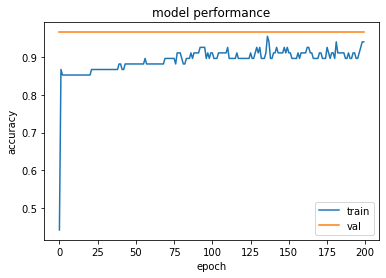

In [ ]:
# Summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()


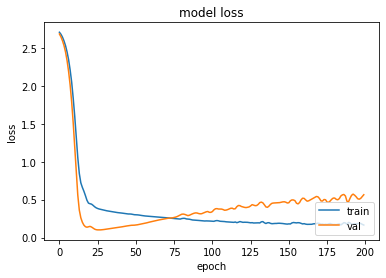

In [ ]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

<AxesSubplot:ylabel='Frequency'>

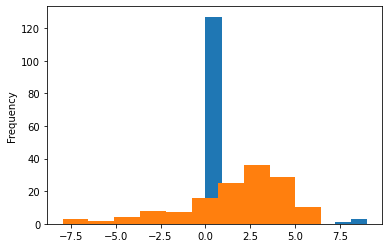

In [ ]:
# plot histogram for the data
df['gene_1000'].plot(kind='hist')
df['IC50'].plot(kind='hist')